In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
country_data = pd.read_csv('Country-data.csv')

In [3]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
X = country_data.drop('country',axis =1)  

y = country_data['country']

In [8]:
X.shape    

(167, 9)

In [9]:
y.shape

(167,)

In [10]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled[:5,:5]

array([[0.42648491, 0.04948197, 0.35860783, 0.25776487, 0.00804721],
       [0.06815969, 0.13953104, 0.29459291, 0.27903729, 0.07493307],
       [0.12025316, 0.1915594 , 0.14667495, 0.18014926, 0.0988094 ],
       [0.56669912, 0.31112456, 0.06463642, 0.24626626, 0.04253523],
       [0.03748783, 0.22707876, 0.2622747 , 0.33825512, 0.14865223]])

In [16]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [17]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [18]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


<AxesSubplot:>

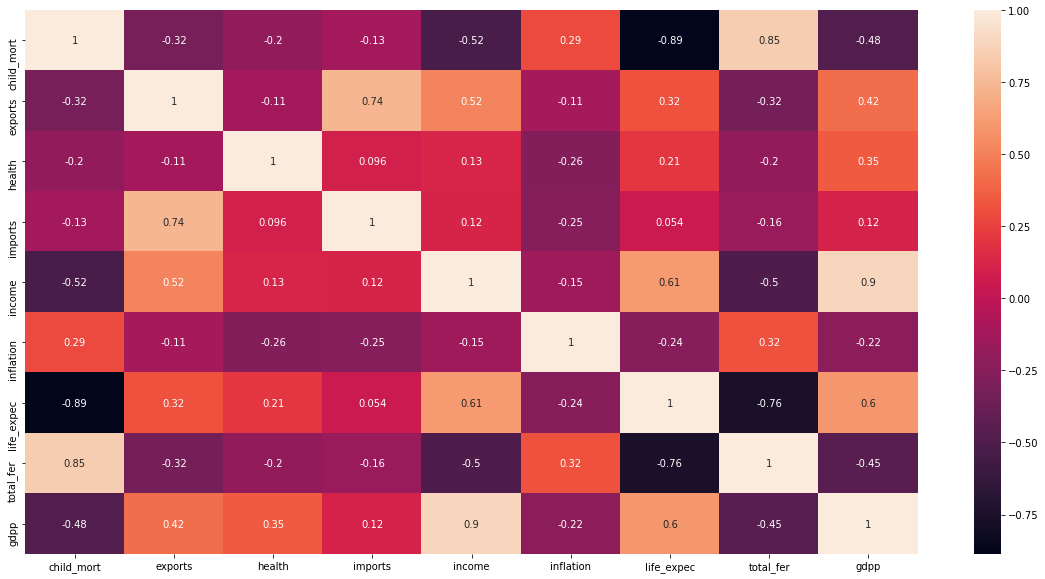

In [19]:

plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=5,random_state=33)

In [22]:
X_pca_final=pca.fit_transform(X_scaled)

In [23]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [24]:
pca.components_[0]

array([-0.47646333,  0.17033279,  0.13388598,  0.08161987,  0.30698142,
       -0.08800904,  0.42053483, -0.57108745,  0.33824337])

In [25]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964])

In [26]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.55001227, 0.6838601 , 0.80687063, 0.9043611 , 0.94214073])

<AxesSubplot:>

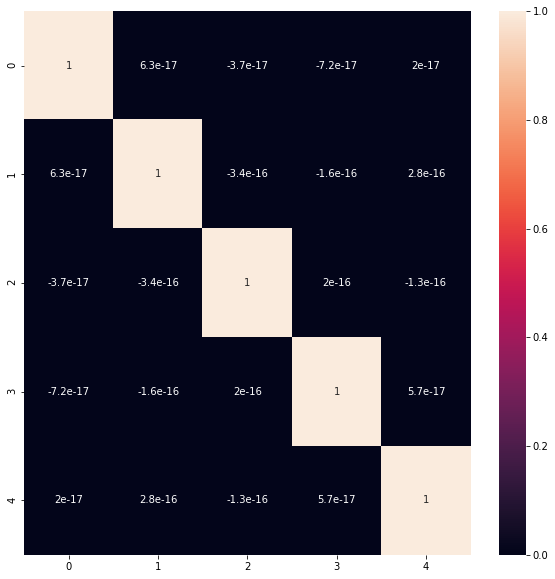

In [27]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
kmeans = KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=4)

In [30]:
kmeans.labels_

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
       0, 1, 0, 3, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 1,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3, 3, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       3, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 1, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 2, 0, 1, 3, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3], dtype=int32)

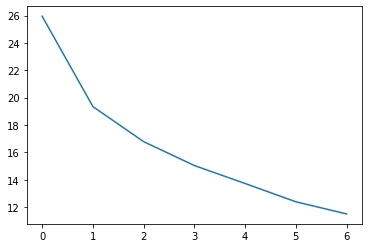

In [31]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [32]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.3987526809982502
For n_clusters=3, the silhouette score is 0.3682498878074275
For n_clusters=4, the silhouette score is 0.37976772384514157
For n_clusters=5, the silhouette score is 0.2750627266171596
For n_clusters=6, the silhouette score is 0.2847446290620004
For n_clusters=7, the silhouette score is 0.23959046583421745
For n_clusters=8, the silhouette score is 0.26474391631377536


In [33]:
#kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=33)
kmeans = KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=4)

In [34]:
df=country_data

In [35]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [36]:
country_data['K-Means_Cluster_ID'] = kmeans.labels_

In [37]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='gdpp'>

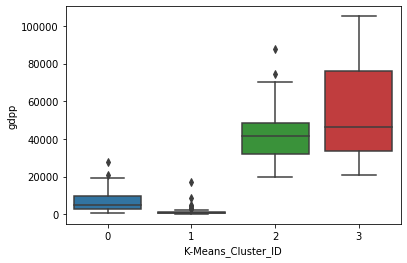

In [38]:
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

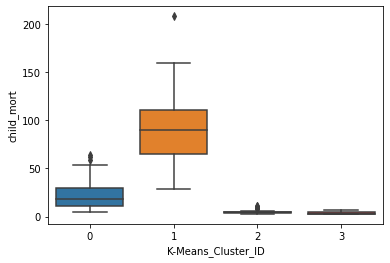

In [39]:
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='income'>

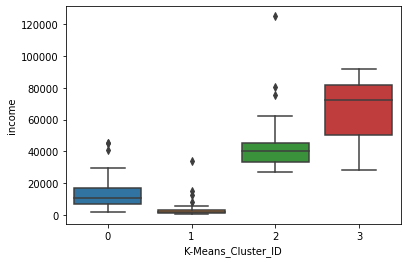

In [40]:

sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data)

In [41]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='gdpp'>

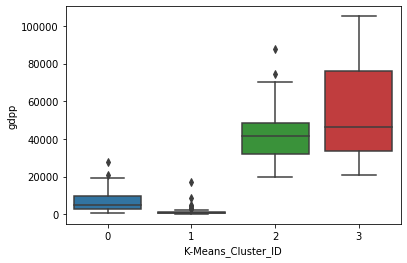

In [42]:
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data)



<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='income'>

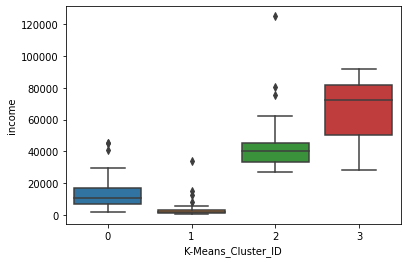

In [43]:
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

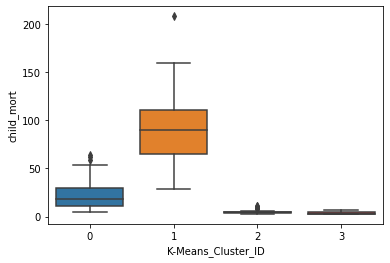

In [44]:
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data)

In [45]:
X_pca_final_df = pd.DataFrame(X_scaled)

In [46]:
X_pca_final_df.head()

,0,1,2,3,4,5,6,7,8
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [47]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_


In [48]:
X_pca_final_df.head()

,0,1,2,3,4,5,6,7,8,K_Means_Cluster_ID
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

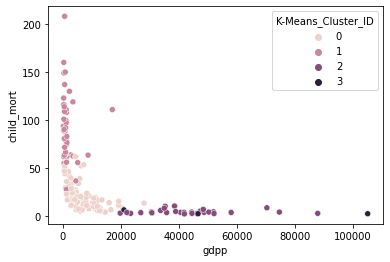

In [49]:
sns.scatterplot(x='gdpp',y='child_mort',data=country_data,hue='K-Means_Cluster_ID')

<AxesSubplot:xlabel='gdpp', ylabel='income'>

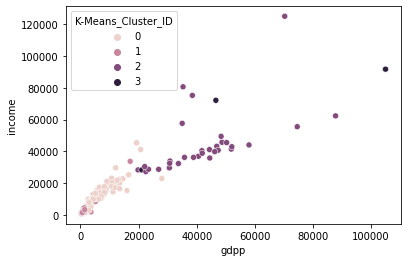

In [50]:
sns.scatterplot(x='gdpp',y='income',data=country_data,hue='K-Means_Cluster_ID')


<AxesSubplot:xlabel='child_mort', ylabel='income'>

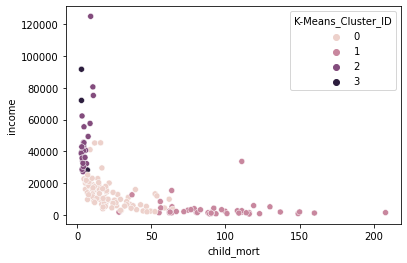

In [51]:
sns.scatterplot(x='child_mort',y='income',data=country_data,hue='K-Means_Cluster_ID')

In [52]:
K_Means_countries = country_data[country_data['K-Means_Cluster_ID'] == 1]

a=K_Means_countries.country.unique()
K_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043,1.0
std,34.079410,18.479530,2.668183,18.636362,5391.402727,15.670791,6.473859,0.940327,2795.655748,0.0
min,28.100000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,3.150000,231.000000,1.0
25%,64.625000,16.875000,4.515000,30.225000,1390.000000,3.940000,56.925000,4.570000,548.500000,1.0
50%,90.250000,23.800000,5.480000,41.500000,1835.000000,8.995000,60.250000,5.085000,833.000000,1.0
75%,111.000000,38.800000,7.845000,49.525000,3310.000000,16.600000,62.875000,5.672500,1310.000000,1.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


In [53]:
K_Means_countries = country_data[country_data['K-Means_Cluster_ID'] == 0]
K_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,22.248276,40.795276,6.245172,47.286964,12913.678161,7.527138,72.616092,2.283333,6833.356322,0.0
std,14.470434,19.364753,2.168167,19.811400,8631.565397,7.751148,4.552277,0.662370,5238.844862,0.0
min,4.500000,0.109000,1.970000,0.065900,1990.000000,-4.210000,54.300000,1.250000,592.000000,0.0
25%,11.350000,26.900000,4.885000,31.900000,6720.000000,2.355000,70.100000,1.740000,2980.000000,0.0
50%,18.100000,37.600000,5.980000,48.700000,10900.000000,5.880000,73.700000,2.230000,5080.000000,0.0
75%,29.150000,51.500000,7.525000,60.250000,17250.000000,9.905000,76.050000,2.655000,9685.000000,0.0
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,0.0


In [54]:
K_Means_countries = country_data[country_data['K-Means_Cluster_ID'] == 2]
K_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548,2.0
std,2.141103,21.675881,3.219729,17.658805,19689.531633,4.261065,1.507337,0.366685,15379.531153,0.0
min,2.600000,12.400000,1.810000,13.600000,27200.000000,-3.220000,76.500000,1.230000,19800.000000,2.0
25%,3.700000,28.650000,8.305000,28.050000,33200.000000,0.497000,79.650000,1.470000,32250.000000,2.0
50%,4.200000,46.200000,9.530000,37.100000,40400.000000,1.160000,80.400000,1.860000,41800.000000,2.0
75%,5.000000,64.150000,11.000000,50.550000,45600.000000,3.190000,81.400000,1.965000,48550.000000,2.0
max,10.800000,103.000000,17.900000,86.500000,125000.000000,16.700000,82.800000,3.030000,87800.000000,2.0


In [55]:
K_Means_countries = country_data[country_data['K-Means_Cluster_ID'] == 3]
K_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,3.0
std,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084,0.0
min,2.800000,153.000000,3.960000,142.000000,28300.000000,-0.046000,80.300000,1.150000,21100.000000,3.0
25%,2.800000,164.000000,5.865000,148.000000,50200.000000,1.787000,80.800000,1.255000,33850.000000,3.0
50%,2.800000,175.000000,7.770000,154.000000,72100.000000,3.620000,81.300000,1.360000,46600.000000,3.0
75%,4.800000,187.500000,8.210000,164.000000,81900.000000,3.725000,82.000000,1.495000,75800.000000,3.0
max,6.800000,200.000000,8.650000,174.000000,91700.000000,3.830000,82.700000,1.630000,105000.000000,3.0


In [56]:
#Scratch

In [57]:
import random

In [58]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [59]:
i_centroid = random.sample(range(0, len(X_scaled)), 4)

In [60]:
i_centroid

[96, 124, 58, 147]

In [61]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [62]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [63]:
initial_centroids = []
for i in i_centroid:
    initial_centroids.append(X_scaled[i])

In [64]:
ic = np.array(initial_centroids)

In [65]:
centroids = findClosestCentroids(initial_centroids, X_scaled)

In [66]:
centroids = initial_centroids
for i in range(20):
    get_centroids = findClosestCentroids(centroids, X_scaled)
    centroids = calc_centroids(get_centroids, X_scaled)

In [67]:
len(get_centroids)

167

In [68]:
df['K-Means_Cluster_ID'] = kmeans.labels_

In [69]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,0.700599
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.832437
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,0.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,0.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,1.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,3.000000


In [70]:
k_Means_countries = df[df['K-Means_Cluster_ID'] == 0]
k_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,22.248276,40.795276,6.245172,47.286964,12913.678161,7.527138,72.616092,2.283333,6833.356322,0.0
std,14.470434,19.364753,2.168167,19.811400,8631.565397,7.751148,4.552277,0.662370,5238.844862,0.0
min,4.500000,0.109000,1.970000,0.065900,1990.000000,-4.210000,54.300000,1.250000,592.000000,0.0
25%,11.350000,26.900000,4.885000,31.900000,6720.000000,2.355000,70.100000,1.740000,2980.000000,0.0
50%,18.100000,37.600000,5.980000,48.700000,10900.000000,5.880000,73.700000,2.230000,5080.000000,0.0
75%,29.150000,51.500000,7.525000,60.250000,17250.000000,9.905000,76.050000,2.655000,9685.000000,0.0
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,0.0


In [71]:
k_Means_countries = df[df['K-Means_Cluster_ID'] == 1]
k_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043,1.0
std,34.079410,18.479530,2.668183,18.636362,5391.402727,15.670791,6.473859,0.940327,2795.655748,0.0
min,28.100000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,3.150000,231.000000,1.0
25%,64.625000,16.875000,4.515000,30.225000,1390.000000,3.940000,56.925000,4.570000,548.500000,1.0
50%,90.250000,23.800000,5.480000,41.500000,1835.000000,8.995000,60.250000,5.085000,833.000000,1.0
75%,111.000000,38.800000,7.845000,49.525000,3310.000000,16.600000,62.875000,5.672500,1310.000000,1.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


In [72]:
df['K-Means_Cluster_ID'].unique()

array([1, 0, 2, 3])

In [73]:
k_Means_countries = df[df['K-Means_Cluster_ID'] == 2]
k_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548,2.0
std,2.141103,21.675881,3.219729,17.658805,19689.531633,4.261065,1.507337,0.366685,15379.531153,0.0
min,2.600000,12.400000,1.810000,13.600000,27200.000000,-3.220000,76.500000,1.230000,19800.000000,2.0
25%,3.700000,28.650000,8.305000,28.050000,33200.000000,0.497000,79.650000,1.470000,32250.000000,2.0
50%,4.200000,46.200000,9.530000,37.100000,40400.000000,1.160000,80.400000,1.860000,41800.000000,2.0
75%,5.000000,64.150000,11.000000,50.550000,45600.000000,3.190000,81.400000,1.965000,48550.000000,2.0
max,10.800000,103.000000,17.900000,86.500000,125000.000000,16.700000,82.800000,3.030000,87800.000000,2.0


In [74]:
k_Means_countries = df[df['K-Means_Cluster_ID'] == 3]
k_Means_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,3.0
std,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084,0.0
min,2.800000,153.000000,3.960000,142.000000,28300.000000,-0.046000,80.300000,1.150000,21100.000000,3.0
25%,2.800000,164.000000,5.865000,148.000000,50200.000000,1.787000,80.800000,1.255000,33850.000000,3.0
50%,2.800000,175.000000,7.770000,154.000000,72100.000000,3.620000,81.300000,1.360000,46600.000000,3.0
75%,4.800000,187.500000,8.210000,164.000000,81900.000000,3.725000,82.000000,1.495000,75800.000000,3.0
max,6.800000,200.000000,8.650000,174.000000,91700.000000,3.830000,82.700000,1.630000,105000.000000,3.0


In [75]:
silhouette_avg = silhouette_score(X_pca_final, kmeans.labels_)
print("For n_clusters={0}, the silhouette score is {1}".format(4, silhouette_avg))
    

For n_clusters=4, the silhouette score is 0.37618574330465143
